In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# 1. Vectorization




Trong Python, vectorization (vector hóa) là kỹ thuật thay thế các vòng lặp for tuần tự bằng các phép toán được thực hiện trực tiếp trên mảng `array` hoặc `vector`. Thay vì xử lý từng phần tử một cách thủ công, **vectorization** tận dụng khả năng tính toán song song của các thư viện như `NumPy`, giúp mã nguồn ngắn gọn hơn, dễ đọc hơn và đặc biệt là tăng tốc độ xử lý đáng kể. Kỹ thuật này đóng vai trò quan trọng trong các bài toán học máy, xử lý dữ liệu và tối ưu hóa hiệu năng, nơi mà các phép toán ma trận hoặc vector thường xuyên được sử dụng.


## Dot Product ( Tích vô hướng )
Về mặt đại số, tích vô hướng giữa hai vector được định nghĩa là tổng của các tích phần tử tương ứng, giả sử ta có hai vector:

$$ \mathbf{a} = [a_1, a_2, \ldots, a_n], \quad \mathbf{b} = [b_1, b_2, \ldots, b_n] $$

thì tích vô hướng của chúng được tính như sau:

$$ \mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i $$

Kết quả của phép nhân này là **một số vô hướng (scalar)**, chứ không phải một vector.

**Bài tập**:Khởi tạo hai vector 1D có kích thước `n` = 1000, hãy thực hiện việc tính toán bằng vòng lặp `for` và `np.dot`:

In [2]:
n = 1000
a = np.random.randint(0, 100, size=n)
b = np.random.randint(0, 100, size=n)

# --- Cách 1: Dùng for ---
start = time.time()
dot_loop = 0
### ==== YOUR CODE START HERE ==== ###
for i in range(n):
    dot_loop += a[i] * b[i]


### ==== END HERE ==== ###
end = time.time()
loop_time = end - start


# --- Cách 2: Dùng NumPy dot ---
start = time.time()
dot_numpy = 0
### ==== YOUR CODE START HERE ==== ###
dot_numpy = np.dot(a, b)

### ==== END HERE ==== ###
end = time.time()
dot_time = end - start



print("Dot (for loop):", dot_loop)
print("Time (for loop):", loop_time, "seconds")
print("\nDot (np.dot):", dot_numpy)
print("Time (np.dot):", dot_time, "seconds")
print("\nGap:", float(loop_time / dot_time))

Dot (for loop): 2521448
Time (for loop): 0.0006160736083984375 seconds

Dot (np.dot): 2521448
Time (np.dot): 0.0002741813659667969 seconds

Gap: 2.2469565217391305


## Outer Product (Tích ngoại)

**Tích ngoại** giữa hai vector tạo ra một **ma trận**, trong đó mỗi phần tử của ma trận là tích của một phần tử trong vector thứ nhất với một phần tử trong vector thứ hai.Về mặt đại số, nếu:

$$ \mathbf{a} = [a_1, a_2, \ldots, a_m], \quad \mathbf{b} = [b_1, b_2, \ldots, b_n] $$

Thì tích ngoài của chúng được định nghĩa là:
$$
\mathbf{A} = \mathbf{a} \otimes \mathbf{b} =
\begin{bmatrix}
  a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n \\
  a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n \\
  \vdots & \vdots & \ddots & \vdots \\
  a_m b_1 & a_m b_2 & \cdots & a_m b_n
\end{bmatrix}
$$


**Bài tập**:Khởi tạo hai vector 1D có kích thước `n` = 1000, hãy thực hiện việc tính toán bằng vòng lặp `for` và `np.outer`:

In [3]:
# --- Cách 1: Dùng for ---
start = time.time()
outer_loop = np.zeros((len(a), len(b)))
### ==== YOUR CODE START HERE ==== ###
for i in range(len(a)):
    for j in range(len(b)):
        outer_loop[i, j] = a[i] * b[j]
### ==== END HERE ==== ###
end = time.time()
loop_time = end - start


# --- Cách 2: Dùng NumPy dot ---
start = time.time()
outer_numpy = np.zeros((len(a), len(b)))
### ==== YOUR CODE START HERE ==== ###
outer_numpy = np.outer(a, b)

### ==== END HERE ==== ###
end = time.time()
dot_time = end - start


print("Two matrices are equal:", np.allclose(outer_loop, outer_numpy))
print("Time (for loop):", loop_time, "seconds")
print("Time (np.outer):", dot_time, "seconds")
print("\nGap:", float(loop_time / dot_time))


Two matrices are equal: True
Time (for loop): 0.4780430793762207 seconds
Time (np.outer): 0.0014128684997558594 seconds

Gap: 338.3493081336483


## Element-wise Product (Nhân từng phần tử)

**Nhân từng phần tử** (element-wise product) là phép toán trong đó **các phần tử tương ứng** của hai vector (hoặc ma trận cùng kích thước) được nhân trực tiếp với nhau.  
Khác với **dot product** hay **outer product**, kết quả của phép nhân này **giữ nguyên hình dạng** của các toán hạng ban đầu.

Giả sử ta có hai vector:
$$
\mathbf{a} = [a_1, a_2, \ldots, a_n], \quad \mathbf{b} = [b_1, b_2, \ldots, b_n]
$$

thì phép **nhân từng phần tử** được định nghĩa là:
$$
\mathbf{a} \odot \mathbf{b} = [a_1 b_1, a_2 b_2, \ldots, a_n b_n]
$$



**Bài tập**:Khởi tạo hai vector 2D có kích thước `(n,m)` = (100,100), hãy thực hiện việc tính toán bằng vòng lặp `for` và `np.outer`:

In [4]:
a = np.random.randint(0, 10, (100, 100))
b = np.random.randint(0, 10, (100, 100))

# --- Cách 1: Dùng for ---
start = time.time()
element_loop = np.zeros_like(a)
### ==== YOUR CODE START HERE ==== ###


### ==== END HERE ==== ###
end = time.time()
loop_time = end - start


# --- Cách 2: Dùng NumPy dot ---
start = time.time()

element_numpy = np.zeros_like(a)
### ==== YOUR CODE START HERE ==== ###


### ==== END HERE ==== ###
end = time.time()
dot_time = end - start


print("Two matrices are equal:", np.allclose(element_loop, element_numpy))
print("Time (for loop):", loop_time, "seconds")
print("Time (np.multiply):", dot_time, "seconds")
print("\nGap:", float(loop_time / dot_time))

Two matrices are equal: True
Time (for loop): 7.605552673339844e-05 seconds
Time (np.multiply): 5.4836273193359375e-05 seconds

Gap: 1.3869565217391304


## Tích Hai Ma Trận (Matrix Multiplication)

**Tích hai ma trận** là phép toán trong đó kết quả là một ma trận được tính bằng cách lấy **tích vô hướng** giữa các **hàng** của ma trận thứ nhất và các **cột** của ma trận thứ hai.

Phép nhân ma trận $\mathbf{C} = \mathbf{A}\mathbf{B}$ chỉ khả thi nếu số cột của $\mathbf{A}$ bằng số hàng của $\mathbf{B}$.

Về mặt đại số, nếu:

$$\mathbf{A} \text{ là ma trận } m \times k, \quad \mathbf{B} \text{ là ma trận } k \times n$$

Thì ma trận kết quả $\mathbf{C}$ sẽ là ma trận $m \times n$, với mỗi phần tử $c_{ij}$ được định nghĩa là:

$$
c_{ij} = \sum_{l=1}^{k} a_{il} b_{lj}
$$

**Ví dụ:**

Nếu $\mathbf{A}$ là ma trận $2 \times 3$ và $\mathbf{B}$ là ma trận $3 \times 2$:
$$
\mathbf{A} =
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23}
\end{bmatrix},
\quad
\mathbf{B} =
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
b_{31} & b_{32}
\end{bmatrix}
$$
Thì phần tử $c_{11}$ của $\mathbf{C}$ là:

$$
c_{11} = a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31}
$$

**Lưu ý quan trọng:** Phép nhân ma trận **không có tính giao hoán** ($\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$).

In [5]:
a = np.random.randint(0, 10, (100, 100))
b = np.random.randint(0, 10, (100, 100))

n = a.shape[0]
# --- Cách 1: Dùng for ---
start = time.time()
matrix_loop = np.zeros_like(a)
### ==== YOUR CODE START HERE ==== ###

# A[i, k] * B[k, j]
for i in range(n):
    for j in range(n):
        for k in range(n):
            matrix_loop[i, j] += a[i, k] * b[k, j]

### ==== END HERE ==== ###
end = time.time()
loop_time = end - start


# --- Cách 2: Tích hai ma trận Dùng NumPy Dot/Matmul (@) ---
start = time.time()
### ==== YOUR CODE START HERE ==== ###
matrix_matmul = np.matmul(a, b)


### ==== END HERE ==== ###
end = time.time()
dot_time = end - start

#matrix_dot = np.dot(a,b)

# print("Two matrices are equal:", np.allclose(matrix_loop, matrix_matmul))
# print("Two matrices are equal:", np.allclose(matrix_dot, matrix_matmul))
print("Time (for loop):", loop_time, "seconds")
print("Time (np.matmul):", dot_time, "seconds")
print("\nGap:", float(loop_time / dot_time))

Time (for loop): 0.6560571193695068 seconds
Time (np.matmul): 0.0010409355163574219 seconds

Gap: 630.2572148419606


## Lưu ý khi dùng `np.dot` và `np.matmul`
Cả `np.dot` và `np.matmul` đều được dùng để thực hiện phép nhân ma trận trong NumPy khi $d < 3$, nhưng chúng có hành vi khác nhau khi số chiều của mảng lớn hơn 2. Chúng ta có thể tham khảo ví dụ dưới đây:


In [6]:
# ====== Trường hợp 2D ======
a_2d = np.random.randint(0, 10, (3, 4))
b_2d = np.random.randint(0, 10, (4, 5))

dot_2d = np.dot(a_2d, b_2d)
matmul_2d = np.matmul(a_2d, b_2d)

print("=== 2D case ===")
print("np.dot == np.matmul:", np.allclose(dot_2d, matmul_2d))
print("dot_2d shape:", dot_2d.shape)
print("matmul_2d shape:", matmul_2d.shape)
print()

# ====== Trường hợp 3D ======
a_3d = np.random.randint(0, 10, (2, 3, 4))
b_3d = np.random.randint(0, 10, (2, 4, 5))

dot_3d = np.dot(a_3d, b_3d)
matmul_3d = np.matmul(a_3d, b_3d)

print("=== 3D case ===")
print("np.dot result shape:", dot_3d.shape)
print("np.matmul result shape:", matmul_3d.shape)

=== 2D case ===
np.dot == np.matmul: True
dot_2d shape: (3, 5)
matmul_2d shape: (3, 5)

=== 3D case ===
np.dot result shape: (2, 3, 2, 5)
np.matmul result shape: (2, 3, 5)


Ngoài ra các bạn có thể truy cập bài viết sau:

[Link](https://mkang32.github.io/python/2020/08/30/numpy-matmul.html)

# 2. Hồi Quy Tuyến Tính - Linear Regression

Để xây dựng một mô hình học có giám sát, ta giả sử rằng mỗi điểm dữ liệu bao gồm một vector đặc trưng $X \in \mathrm{R^n}$ và một giá trị đầu ra tương ứng $y$. Mỗi phần tử $x_i$ trong vector đặc trưng biểu diễn một thuộc tính của đối tượng cần dự đoán. Từ những đặc trưng này, ta cần xây dựng cách biểu diễn hàm giả thuyết $h$, một lựa chọn đơn giả là sử dụng **mô hình tuyến tính**, trong đó:

$$
h_{\theta}(x)= \theta_0 + \theta_1 x_1 + \ldots \theta_n x_n
$$

Các tham số $\theta_i$ được gọi là **tham số mô hình (parameters) hoặc trọng số (weights)**, đặc trưng cho không gian các hàm tuyến tính ánh xạ từ tập đầu vào $\mathcal{X}$ sang tập đầu ra $\mathcal{Y}$. Đặt $x_0$ = 1, công thức trên có thể viết lại như sau:

$$
h(x)= \sum_{i=0}^{n} \theta_i x_i = \theta^{T}x
$$

Sau khi đã xác định được mô hình tuyến tính $h(x)$, bước tiếp theo là tìm cách ước lượng các tham $\theta$ sao cho mô hình dự đoán $h(x)$ gần nhất với giá trị thực tế $y$ trên tập dữ liệu huấn luyện.

Để thực hiện điều này, một phương pháp là lựa chọn các giá trị $\theta$ sao cho sai số dự đoán của mô hình và giá trị thật là nhỏ nhất trên toàn bộ tập huấn luyện. Để biểu diễn điều này một cách định lượng, ta định nghĩa một **hàm chi phí (cost function)** — hay còn gọi là **hàm mất mát (loss function)** — nhằm đo lường mức độ sai lệch giữa giá trị dự đoán và giá trị thực tế:

$$
J_{\theta} = \frac{1}{2} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

Từ hàm mất mát ở trên, có thể thấy ta phải tìm được giá trị $\theta$ sao cho $J$ nhỏ nhất. Lấy đạo hàm $J$ theo $\theta$, ta có:

$$
\begin{aligned}
\nabla_\theta J = \
X^{T}(X\theta - y)
\end{aligned}
$$

Để cực tiểu hóa $J$, với $\nabla_\theta J$ = 0, ta được:

$$
\theta = (X^TX)^{-1}X^Ty
$$


Trong phần này, ta sẽ xây dựng và huấn luyện mô hình **Linear Regression (Hồi quy tuyến tính)** từ đầu, hỗ trợ hai phương pháp huấn luyện:


1.   **Normal Equation**: tính trực tiếp nghiệm đóng (closed-form solution)
2.   **Gradient Descent** : tìm nghiệm bằng cách lặp tối ưu hàm mất mát.

Mục tiêu là hiểu rõ cách hoạt động bên trong của từng phương pháp


**Bài tập**: Hoàn thành hàm tính $\theta$ dưới đây dựa trên công thức đã tìm được ở trên

<details>
  <summary><font size="3" color="darkgreen"><b>Hints</b></font></summary>
    
  - Phép toán (X^T X)^(-1) có thể được tính toán bằng cách sử dụng thư viện `np.linalg.pinv`
  - Các phép tích ma trận có thể sử dụng `np.matmul` hoặc đơn giản hơn là toán tử `@`


</details>

In [7]:
class SimpleLinearRegression(object):
    """
    Linear Regression sử dụng Normal Equation

    """

    def __init__(self, verbose: bool = False):
        self.theta = None
        self.verbose = verbose

    def fit(self, x, y):
      ### ---- Your code start here ---- ###
      #self.theta =
      self.theta = np.linalg.inv(x.T @ x) @ (x.T @ y)
      if self.verbose:
          print("True theta :", self.theta.flatten())
      ### ---- Your code end here ---- ###

    def predict(self, x):
      ### ---- Your code start here ---- ###
      return x @ self.theta
      ### ---- Your code end here ---- ###

In [8]:
np.random.seed(42)
X_sample = 2 * np.random.rand(100, 1)
y = 5 + 3 * X_sample + np.random.randn(100, 1) * 0.5 # ( 3x + 5 + noise)

In [9]:
# Thêm bias vào X_sample
#X_b =
X_b = np.c_[np.ones((X_sample.shape[0], 1)), X_sample]  # add x0 = 1 to each instance

In [10]:
ne_model = SimpleLinearRegression(verbose = True)
ne_model.fit(X_b, y.flatten())


True theta : [5.10754808 2.88505669]


In [11]:
X_new = np.array([[0], [2]])
# Thêm bias cho X_new
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]  # add x0 = 1 to each instance
#X_new_b =

predictions = ne_model.predict(X_new_b)
print(predictions)

[ 5.10754808 10.87766147]


## Gradient Descent

Ngoài ra, còn một phương thức là sử dụng Gradient Descent với
$$
\theta^{(t)} = \theta^{(t-1)} - \eta X^{T}(X\theta - y)
$$


<details>
  <summary><font size="3" color="darkgreen"><b>Hints</b></font></summary>
    
  - Phép toán (X^T X)^(-1) có thể được tính toán bằng cách sử dụng thư viện `np.linalg.pinv`
  - Các phép tích vô hướng có thể sử dụng `np.matmul` hoặc đơn giản hơn là toán tử `@`
  - Một lưu ý nhỏ cho các bạn là với các bài toán từ 1D, 2D thì `np.dot` và `np.matmul` sẽ cho kết quả tương đương. Nhưng với các bài toán nhân ma trận từ 3D trở lên thì khuyến khích nên sử dụng `np.matmul`. Các bạn có thể đọc docs của hàm `np.dot` để hiểu sự khác biết giữa hai hàm khi tính toán trên không gian nhiều chiều.

</details>


**Bài tập:**  hãy hoàn tất Class `SimpleLinearRegressionWGD` dưới đây biết :

  - `gradient_descent`: cập nhật tham số lặp lại bằng công thức $\theta^{(t)} = \theta^{(t-1)} - \eta \frac{1}{m} X^{T}(X\theta - y) $

- Lớp Linear Regression có các thuộc tính chính như sau:
  - `step_size`: tốc độ học (chỉ dùng cho Gradient Descent).
  - `max_iter`: số vòng lặp tối đa.
  - `eps`: ngưỡng dừng khi mô hình hội tụ.
  - `verbose`: nếu bật, in ra quá trình huấn luyện.

In [12]:
from dbm import error


class SimpleLinearRegressionWGD(object):
    """
    Cài đặt Hồi quy Tuyến tính (Linear Regression) sử dụng phương pháp
    Gradient Descent.
    """
    def __init__(self, step_size=0.01, max_iter=1000, eps=1e-5, verbose=True):
        """
        Khởi tạo mô hình Hồi quy tuyến tính bằng phương pháp Gradient Descent đơn giản.

        Tham số:
            step_size: Tốc độ học (learning rate) (mặc định: 0.01).
            max_iter: Số lần lặp tối đa (mặc định: 1000).
            eps: Ngưỡng hội tụ dựa trên độ thay đổi của tham số theta (mặc định: 1e-5).
            verbose: Có in ra giá trị mất mát (loss) sau mỗi vòng lặp hay không (mặc định: True).
        """
        self.theta = None
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose
        self.loss_history = []

    def _compute_gradient(self, X, y, m):
        """
        Tính toán gradient của hàm mất mát (loss function) theo tham số theta.

        Công thức: (1/m) * X^T * (X * theta - y)
        """
        grad = 0
        ### --- Your code start here --- ###
        # Sai số: (X * theta - y)
        error = X @ self.theta - y
        # Gradient tiêu chuẩn
        grad = (1/m) * (X.T @ error)
        ### --- Your code end here --- ###
        return grad

    def _compute_loss(self, X, y, m):
        """
        Tính mất mát (loss) dựa trên Mean Squared Error (MSE).
        """

        ### --- Your code start here --- ###
        error = X @ self.theta - y
        loss = (1/(2*m)) * np.sum(np.square(error))
        ### --- Your code end here --- ###
        return loss

    def fit(self, X, y):
        """
        Chạy thuật toán Gradient Descent để huấn luyện mô hình hồi quy tuyến tính.

        Tham số:
            X: Dữ liệu đầu vào huấn luyện. Kích thước (m, n).
            y: Nhãn (giá trị mục tiêu) của dữ liệu huấn luyện. Kích thước (m,).
        """

        ### ------- Your code start here ------- ###
        # Đảm bảo X là mảng 2D (ví dụ: (100,) -> (100, 1))
        # m: số lượng mẫu (samples), n: số lượng đặc trưng (features)
        m, n = X.shape

        if self.theta is None:
            # Khởi tạo theta bằng vector không
            self.theta = np.zeros((X.shape[1], 1))

        # Đảm bảo y là vector 1D
        if y.ndim > 1 and y.shape[1] == 1:
            y = y.flatten()
        
        if y.ndim == 1:
            y = y.reshape(-1, 1)
            
        for i in range(self.max_iter):

            # 1. Tính toán gradient
            grad = self._compute_gradient(X, y, m)

            # 2. Cập nhật theta
            new_theta = self.theta - self.step_size * grad


            # 3. Kiểm tra hội tụ dựa trên chuẩn L1 của độ thay đổi theta
            theta_change_norm = np.linalg.norm(new_theta - self.theta, ord=1)

            # Cập nhật theta cho lần lặp tiếp theo
            self.theta = new_theta

        ### --- Your code end here --- ###

            # 4. Tùy chọn: In và ghi lại loss
            if self.verbose and (i % 100 == 0 or i == self.max_iter - 1):
                loss = self._compute_loss(X, y, m)
                self.loss_history.append(loss)
                print(f"Iteration {i+1}/{self.max_iter}: Loss = {loss:.6f}")

            # 5. Kiểm tra hội tụ *sau khi* cập nhật
            if theta_change_norm < self.eps:
                if self.verbose:
                    print(f"\nConverged after {i+1} iterations (Change in theta < {self.eps}).")
                break
        else:
            if self.verbose:
                print(f"\nStopped after reaching maximum iterations ({self.max_iter}).")

    def predict(self, X):
        """
        Thực hiện dự đoán với dữ liệu đầu vào mới X.

        Tham số:
            X: Dữ liệu đầu vào có kích thước (m, n).

        Trả về:
            Dữ liệu đầu ra (dự đoán) có kích thước (m,).
        """

        if self.theta is None:
            raise ValueError("Mô hình phải được huấn luyện (gọi fit) trước khi gọi predict.")

        # Đảm bảo X là mảng 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        # Công thức dự đoán tuyến tính:  X @ \theta
        res = X @ self.theta

        return res

In [13]:
gd_model = SimpleLinearRegressionWGD(
  step_size=0.01,
  max_iter=10000,
  eps=1e-8,
  verbose=True
)

gd_model.fit(X_b, y.flatten())
gd_model.theta.flatten()

Iteration 1/10000: Loss = 30.841964
Iteration 101/10000: Loss = 0.791251
Iteration 201/10000: Loss = 0.265934
Iteration 301/10000: Loss = 0.213350
Iteration 401/10000: Loss = 0.180862
Iteration 501/10000: Loss = 0.157808
Iteration 601/10000: Loss = 0.141395
Iteration 701/10000: Loss = 0.129709
Iteration 801/10000: Loss = 0.121389
Iteration 901/10000: Loss = 0.115466
Iteration 1001/10000: Loss = 0.111248
Iteration 1101/10000: Loss = 0.108246
Iteration 1201/10000: Loss = 0.106108
Iteration 1301/10000: Loss = 0.104586
Iteration 1401/10000: Loss = 0.103502
Iteration 1501/10000: Loss = 0.102730
Iteration 1601/10000: Loss = 0.102181
Iteration 1701/10000: Loss = 0.101790
Iteration 1801/10000: Loss = 0.101511
Iteration 1901/10000: Loss = 0.101313
Iteration 2001/10000: Loss = 0.101172
Iteration 2101/10000: Loss = 0.101071
Iteration 2201/10000: Loss = 0.101000
Iteration 2301/10000: Loss = 0.100949
Iteration 2401/10000: Loss = 0.100913
Iteration 2501/10000: Loss = 0.100887
Iteration 2601/10000: L

array([5.10754496, 2.88505945])

In [14]:
predictions2 = gd_model.predict(X_new_b)
print(predictions2)

[[ 5.10754496]
 [10.87766385]]


## Ridge Regression
Trong bài học trên lớp chúng ta đã được học về L2-Regularization, hay còn được gọi là Ridge Regression. Mục tiêu của kĩ thuật này là giảm hiện tượng overfitting bằng cách thêm một thành phần phạt (penalty) vào hàm mất mát (loss function).

Cụ thể, hàm mất mát của Ridge Regression có dạng như sau:

$$
J(\theta) = \frac{1}{2m} \| X\theta - y \|^2 + \frac{\lambda}{2m} \| \theta \|^2
$$

Trong đó:
- $\lambda$ là hệ số regularization, điều chỉnh mức độ phạt

Thành phần thứ hai $ \frac{\lambda}{2m} \| \theta \|^2 $ giúp **kiểm soát độ lớn của tham số**, tránh cho mô hình học quá sát dữ liệu huấn luyện (overfit).  
Khi $ \lambda = 0 $, Ridge Regression trở về dạng **Linear Regression thông thường**.  
Ngược lại, khi $ \lambda $ lớn, các trọng số bị ép nhỏ hơn, mô hình trở nên đơn giản hơn và có khả năng **tổng quát hóa tốt hơn**.

  - Công thức tính $\theta$ tối ưu có dạng như sau:
  $$
    \theta = (X^TX + \lambda I)^{-1}X^Ty
  $$

- Gradient tương ứng với L2-Regularization là:
$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y) + \frac{\lambda}{m} \theta
$$


In [15]:
class RidgeWNE(object):

    def __init__(self, l2_lambda: float = 0.1, verbose: bool = True):
        """
        Khởi tạo mô hình Hồi quy Ridge.

        Args:
            l2_lambda: Hệ số điều chuẩn L2 (lambda).
            verbose: Nếu True, in ra các tham số theta sau khi huấn luyện.
        """
        self.theta = None
        self.l2_lambda = l2_lambda
        self.verbose = verbose

    def fit(self, X, y):
        """
        Huấn luyện mô hình Ridge Regression bằng công thức Normal Equation có điều chuẩn.

        Công thức: theta = (X^T X + lambda * I')^-1 X^T y
        (I' là ma trận đơn vị mà phần tử đầu tiên I'[0,0] = 0 để không điều chuẩn bias)
        """
        if y.ndim > 1 and y.shape[1] == 1:
            y = y.flatten()

        n = X.shape[1]

        # 1. Tạo ma trận đơn vị I (kích thước n x n).
        I = np.eye(n)
        # 2. Đặt phần tử đầu tiên I[0, 0] = 0 để KHÔNG điều chuẩn hệ số chặn (bias)
        I[0, 0] = 0
        # 3. Tính toán phần điều chuẩn: lambda * I
        ridge_term = self.l2_lambda * I
        # 4. Tính toán theta theo công thức Normal Equation của Ridge Regression
        # theta = (X^T X + lambda * I)^-1 X^T y // pinv4(-1)
        self.theta = np.linalg.pinv(X.T @ X + ridge_term) @ X.T @ y

        if self.verbose:
            print(f"Lambda={self.l2_lambda}")
            print(f"Optimal Theta (Intercept, Features): {self.theta.flatten()}")

    def predict(self, X):
        """
        Dự đoán giá trị cho các đầu vào mới X.

        Args:
            X: Ma trận đầu vào (phải bao gồm cột bias). Shape (m, n).

        Returns:
            Vector dự đoán. Shape (m,).
        """
        if self.theta is None:
            raise ValueError("Model must be fit before calling predict.")

        return X @ self.theta

In [16]:
ridge_ne = RidgeWNE(l2_lambda=0.5)
ridge_ne.fit(X_b, y.flatten())

predictions3 = ridge_ne.predict(X_new_b)
print(predictions3)

Lambda=0.5
Optimal Theta (Intercept, Features): [5.14570987 2.84447465]
[ 5.14570987 10.83465917]


In [17]:
class RidgeWGD(SimpleLinearRegressionWGD):
    """
    Cài đặt Ridge Regression (Hồi quy Ridge) bằng phương pháp Gradient Descent
    bằng cách thêm thành phần điều chuẩn L2 vào gradient.
    Kế thừa hầu hết các chức năng từ lớp SimpleLinearRegressionWGD.
    """

    def __init__(self, l2_lambda=0.1, **kwargs):
        """
        Khởi tạo mô hình Hồi quy Ridge.

        Tham số:
            l2_lambda: Hệ số điều chuẩn L2 (lambda). Mặc định là 0.1.
            **kwargs: Các tham số khác được truyền cho lớp cơ sở SimpleLinearRegressionWGD.
        """
        super().__init__(**kwargs)
        self.l2_lambda = l2_lambda

    def _compute_gradient(self, X, y, m):
        """
        Ghi đè (override) phương thức tính gradient để bao gồm thêm thành phần điều chuẩn L2.
        """

        # 1. Tính toán gradient không điều chuẩn (unregularized gradient) sử dụng logic của lớp cơ sở
        unregularized_grad = super()._compute_gradient(X, y, m)

        # 2. Tính toán thành phần điều chuẩn
        regularization_term = (self.l2_lambda / m) * self.theta
        # Tạo bản sao của theta và đặt hệ số chặn (bias, chỉ mục 0) bằng 0,
        theta_reg = self.theta.copy()
        # vì bias thường không được điều chuẩn.
        #theta_reg = self.theta.copy()
        #theta_reg[0] = 0

        # L2: (lambda / m) * theta_reg
        regularization_term = (self.l2_lambda / m) * theta_reg
        theta_reg[0] = 0

        # 3. Trả về gradient Ridge hoàn chỉnh
        return unregularized_grad + regularization_term

In [18]:
ridge_wgd = RidgeWGD(
    l2_lambda=0.5,
    step_size=0.01,
    max_iter=10000,
    eps=1e-8,
    verbose=True
)

ridge_wgd.fit(X_b, y.flatten())
ridge_wgd.theta.flatten()

Iteration 1/10000: Loss = 30.841964
Iteration 101/10000: Loss = 0.803079
Iteration 201/10000: Loss = 0.268827
Iteration 301/10000: Loss = 0.214842
Iteration 401/10000: Loss = 0.182468
Iteration 501/10000: Loss = 0.159642
Iteration 601/10000: Loss = 0.143386
Iteration 701/10000: Loss = 0.131773
Iteration 801/10000: Loss = 0.123456
Iteration 901/10000: Loss = 0.117484
Iteration 1001/10000: Loss = 0.113181
Iteration 1101/10000: Loss = 0.110071
Iteration 1201/10000: Loss = 0.107813
Iteration 1301/10000: Loss = 0.106167
Iteration 1401/10000: Loss = 0.104961
Iteration 1501/10000: Loss = 0.104072
Iteration 1601/10000: Loss = 0.103413
Iteration 1701/10000: Loss = 0.102921
Iteration 1801/10000: Loss = 0.102552
Iteration 1901/10000: Loss = 0.102272
Iteration 2001/10000: Loss = 0.102059
Iteration 2101/10000: Loss = 0.101895
Iteration 2201/10000: Loss = 0.101768
Iteration 2301/10000: Loss = 0.101669
Iteration 2401/10000: Loss = 0.101592
Iteration 2501/10000: Loss = 0.101530
Iteration 2601/10000: L

array([5.0575112 , 2.91137507])

In [19]:
print(ne_model.theta.flatten())
print(gd_model.theta.flatten())
print(ridge_wgd.theta.flatten())
print(ridge_ne.theta.flatten())

[5.10754808 2.88505669]
[5.10754496 2.88505945]
[5.0575112  2.91137507]
[5.14570987 2.84447465]


## Bài Tập 1: So Sánh Hồi Quy Tuyến Tính (Linear & Ridge Regression)

### Mục Tiêu

Thực hiện toàn bộ quy trình từ **tải dữ liệu, tiền xử lý, huấn luyện đa mô hình** (sử dụng cả Normal Equation và Gradient Descent), đến **đánh giá** và **trực quan hóa** để so sánh hiệu suất và kết quả của Hồi quy Tuyến tính và Hồi quy Ridge.

---

### Yêu Cầu Chi Tiết

#### 1. Tải và Tiền Xử Lý Dữ Liệu

* **Tải dữ liệu:** Load tập dữ liệu từ file `txt` (`np.loadtxt`).
* **Chia tập dữ liệu:** Chia dữ liệu thành tập huấn luyện (`X_train`, `y_train`) và tập kiểm tra (`X_test`, `y_test`). Sử dụng `train_test_split`
* **Tiền xử lý:**
    * **Thêm Bias Term** ($X_0 = 1$) vào dữ liệu $X$ (cần thiết cho các mô hình tự triển khai).
    * *(Tùy chọn):* Thử nghiệm thêm bước **chuẩn hóa dữ liệu** (ví dụ: `StandardScaler` hoặc `MinMaxScaler`) cho các biến độc lập $X$.

---

#### 2. Huấn luyện Mô hình

Sử dụng tập `X_train` và `y_train` để huấn luyện (fit) các mô hình sau. **Lưu ý:** Đảm bảo sử dụng `X_train` **có hoặc không có Bias Term** tùy thuộc vào yêu cầu của mỗi lớp mô hình.

| Mô hình (Đường Hồi Quy) | Thuật toán | Tham số quan trọng |
| :--- | :--- | :--- |
| **SimpleLinearRegression** | Normal Equation (NE) | Không $\lambda$ |
| **SimpleLinearRegressionWGD** | Gradient Descent (GD) | $lr = 0.001$ |
| **RidgeWNE** | Normal Equation (NE) | $\lambda = 0.3$ |
| **RidgeWGD** | Gradient Descent (GD) | $\lambda = 0.3$, $lr = 0.001$ |
| **LinearRegression** (`sklearn`) | Default | Tự động xử lý |

---

#### 3. Trực quan hóa

**A. Fit**

* Sử dụng tập dữ liệu `(X_train, y_train)` để fit các mô hình ở trên

**B. Chuẩn bị Dữ liệu để Vẽ Đường**

* Tạo **100 điểm** trải đều (`x_line`) giữa giá trị `min` và `max` của $X_{\text{train}}$.
* Thêm Bias Term ($X_0 = 1$) vào `x_line` nếu cần (tạo `x_line_with_bias`).

**C. Trực quan hóa Kết quả**

* Vẽ biểu đồ so sánh:
    * **`plt.scatter`** dữ liệu huấn luyện (Training Data) và dữ liệu kiểm tra (Test Data).
    * **`plt.plot`** đường hồi quy dự đoán từ **mỗi mô hình** trên các điểm `x_line` (sử dụng màu sắc khác nhau để phân biệt).
* Đảm bảo biểu đồ có đầy đủ **nhãn trục (xlabel, ylabel)**, **tiêu đề (title)** và **chú giải (`plt.legend()`)**.

### Load Dữ Liệu

In [20]:
data = np.loadtxt("/content/ex1data1.txt", delimiter=',')
X = data[:,0]
y = data[:,1]

print(X.shape, y.shape)

FileNotFoundError: /content/ex1data1.txt not found.

In [ ]:
# Add bias column

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(77, 2)
(77,)


### Model

In [ ]:
mode_1 = SimpleLinearRegression()
mode_1.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
mode_2 = SimpleLinearRegressionWGD(
  step_size=0.01,
  max_iter=1000,
  eps=1e-6,
  verbose=False
)
mode_2.fit(X_train, y_train)

In [ ]:
mode_3 = RidgeWNE(l2_lambda = 0.3)
mode_3.fit(X_train, y_train)

Lambda=0.3
Optimal Theta (Intercept, Features): [-4.72936023  1.28715556]


In [ ]:
mode_4 = RidgeWGD(l2_lambda = 0.3,
                  step_size=0.01,
                  max_iter=10000,
                  eps=1e-8,
                  verbose=False
                )
mode_4.fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

LinearRegression()

### Vẽ Đường Hồi Quy

In [ ]:
### Tạo 100 điểm cách đều nhau giữa giá trị nhỏ nhất và lớn nhất của đặc trưng sử dụng np.linspace
### và thêm bias.
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

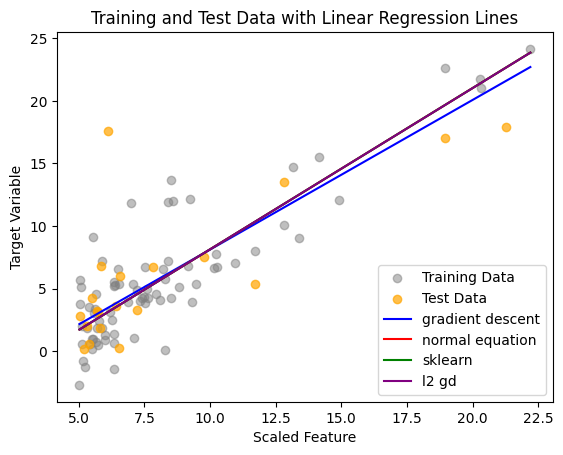

In [ ]:

### 1. Vẽ các điểm dữ liệu huấn luyện và kiểm thử để quan sát trực quan
### Sử dụng plt.scatter
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

### 2. Tạo các giá trị dự đoán tương ứng với từng mô hình hồi quy
### Predict với x_line_with_bias
y_pred_model_1 = model_1.predict(X_new)
y_pred_model_2 = model_2.predict(X_new)
y_pred_model_3 = model_3.predict(X_new)

### 3. Vẽ các đường hồi quy tương ứng với từng mô hình để so sánh
### plt.plot , set color = cho từng đường. Eg plt.plot(...., color ='gray', )
plt.plot(X_new, y_pred_model_1, color='green', label='Normal Equation')
plt.plot(X_new, y_pred_model_2, color='orange', label='Gradient Descent')
plt.plot(X_new, y_pred_model_3, color='purple', label='Ridge Normal Equation')
plt.plot(X_new, model4.predict(X_new), color='brown', label='Ridge Gradient Descent')
plt.plot(X_new, sklearn_model.predict(X_new), color='gray', label='Sklearn Linear Regression')

##----- Thiết lập nhãn trục, tiêu đề và hiển thị chú thích
plt.xlabel("Scaled Feature")
plt.ylabel("Target Variable")
plt.title("Training and Test Data with Linear Regression Lines")
plt.legend()
plt.show()

## Bài tập 2:
Boston Housing Dataset

| Tên Cột | Mô Tả Chi Tiết | Ý Nghĩa Trong Dự Đoán Giá Nhà (Maybe?)|
| :--- | :--- | :--- |
| **CRIM** | Tỷ lệ tội phạm bình quân đầu người theo thị trấn. | Tội phạm cao $\rightarrow$ Giá nhà thấp hơn. |
| **ZN** | Tỷ lệ đất ở được quy hoạch cho các lô trên 25.000 sq.ft. | Thể hiện khu vực có nhiều đất trống/đất phát triển. |
| **INDUS** | Tỷ lệ diện tích kinh doanh phi bán lẻ trên mỗi thị trấn. | Khu công nghiệp/thương mại $\rightarrow$ Giá nhà có thể giảm. |
| **CHAS** | Biến giả Charles River (1 nếu tiếp giáp sông; 0 nếu không). | Vị trí ven sông thường làm tăng giá trị nhà. |
| **NOX** | Nồng độ oxit nitric (ô nhiễm không khí) (parts per 10 million). | Ô nhiễm cao $\rightarrow$ Giá nhà giảm. |
| **RM** | **Số phòng trung bình** trên mỗi căn nhà. | Yếu tố quan trọng ảnh hưởng **tích cực** đến giá nhà. |
| **AGE** | Tỷ lệ căn nhà do chủ sở hữu ở được xây dựng trước năm 1940. | Thể hiện tuổi thọ và chất lượng của khu dân cư. |
| **DIS** | Khoảng cách có trọng số đến **năm trung tâm việc làm** lớn ở Boston. | Khoảng cách gần trung tâm $\rightarrow$ Giá nhà cao hơn. |
| **RAD** | Chỉ số tiếp cận với các đường cao tốc xuyên tâm. | Khả năng tiếp cận giao thông tốt $\rightarrow$ Giá nhà tăng. |
| **TAX** | Thuế tài sản toàn giá trị trên \$10,000. | Thường tương quan cao với RAD. |
| **PTRATIO**| Tỷ lệ giáo viên/học sinh theo thị trấn. | Tỷ lệ thấp (chất lượng giáo dục tốt) $\rightarrow$ Giá nhà cao hơn. |
| **B** | $1000(B_k - 0.63)^2$ với $B_k$ là tỷ lệ người gốc Phi theo thị trấn. | Thước đo liên quan đến yếu tố sắc tộc và xã hội. |
| **LSTAT** | **Tỷ lệ phần trăm dân số có địa vị thấp hơn.** | Tỷ lệ cao $\rightarrow$ Giá nhà thấp hơn. |
| **MEDV** | **Giá trị trung bình** của nhà do chủ sở hữu ở (đơn vị \$1000's). | **Biến Mục Tiêu ($y$)** mà mô hình cần dự đoán. |



**Bài tập**: Sử dụng bộ dữ liệu này, hãy thực hiện các việc sau đây:
- Thực hiện dự đoán bằng một trong bốn mô hình vừa implement trước đó.
- Thử thực với mô hình Linear Regression của sklearn
- Tạo bảng so sánh bằng pandas với 5 cột: `y_test`, `medv_predict`, `medv_l2`, `medv_sklearn`
- Thêm vào bảng các cột `error`,`skd_error` là MSE giữa các giá trị dự đoán và y_test

- **Optional**: Có cách nào cải thiện hiệu quả của mô hình hay không? nếu có hãy đề xuất và trình bày và implement (1 điểm cộng nếu code thực sự cải thiện)


In [ ]:
df = pd.read_csv('/content/BostonHousing.csv')
df.head(0)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


Iteration 1/10000: Loss = 302.477589
Iteration 101/10000: Loss = 237.938623
Iteration 201/10000: Loss = 192.528478
Iteration 301/10000: Loss = 157.805750
Iteration 401/10000: Loss = 130.291245
Iteration 501/10000: Loss = 108.170810
Iteration 601/10000: Loss = 90.278770
Iteration 701/10000: Loss = 75.765268
Iteration 801/10000: Loss = 63.972765
Iteration 901/10000: Loss = 54.379668
Iteration 1001/10000: Loss = 46.567916
Iteration 1101/10000: Loss = 40.200862
Iteration 1201/10000: Loss = 35.006748
Iteration 1301/10000: Loss = 30.765845
Iteration 1401/10000: Loss = 27.300266
Iteration 1501/10000: Loss = 24.465843
Iteration 1601/10000: Loss = 22.145616
Iteration 1701/10000: Loss = 20.244614
Iteration 1801/10000: Loss = 18.685651
Iteration 1901/10000: Loss = 17.405947
Iteration 2001/10000: Loss = 16.354399
Iteration 2101/10000: Loss = 15.489376
Iteration 2201/10000: Loss = 14.776946
Iteration 2301/10000: Loss = 14.189427
Iteration 2401/10000: Loss = 13.704227
Iteration 2501/10000: Loss = 13

Test MSE (Gradient Descent): 25.4036


In [ ]:
comparison_all_df = pd.DataFrame({
    'Actual_MEDV': 0,
    'Predict': 0,
    'SKLearn_Predict': 0,
    'Error': 0,
    'SKL_Error': 0,
})

print(comparison_all_df.head(50))